In [32]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm
import time
import seaborn as sns

import numpy as np
import matplotlib.pylab as plt
from scipy.interpolate import interp1d
from scipy.special import ellipj
from scipy.special import ellipkinc
from scipy.optimize import fsolve

In [26]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [125]:
M = 1 # massa do BURACO negro
b_c = 3*np.sqrt(3)*M # parametro de impacto CRITICO
theta_0 = 85*np.pi/180. #angulo de visada do buraco negro

def B_fun(p):
    return (p**3/(p-2*M))**0.5

In [126]:
theta_0*180/np.pi

85.0

In [123]:
def Q_fun(P):    
    return ((P - 2*M)*(P+6*M))**0.5


def gamma(alpha, theta_0):
    a = np.cos(alpha)**2 + 1/(np.tan(theta_0)**(2))
    return np.arccos( np.cos(alpha)/(a**0.5)  )


def k2(P):
   
    Q = Q_fun(P)
    return ((Q-P+6*M)/(2*Q))

def zeta_inf(P):
    Q = Q_fun(P)
    ratio = (Q-P+2*M)/(Q-P +6*M)
    return np.arcsin( ratio**0.5 )

def Up(P,alpha): #u = 1/r
    # b = np.sqrt(X**2 + Y**2)
    # alpha = np.arctan(Y/X)
    Q = Q_fun(P)
    A1 = (Q-P+2*M)/(4*M*P)
    A2 = (Q-P+6*M)/(4*M*P)
    g = gamma(alpha,theta_0)
    ratio = (Q/P)**0.5
    mod = k2(P)
    sn, cn, dn, ph = ellipj( ((g/2)*ratio + ellipkinc(zeta_inf(P) , mod)), mod )
    
    return -A1 + A2*sn**2 #tenho de procurar jacobi porra

52it [01:04,  1.24s/it]


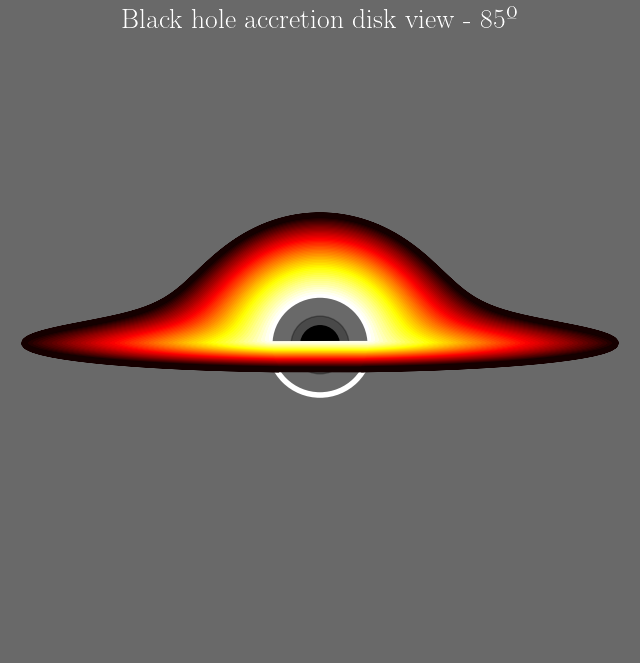

In [127]:
fig, ax = plt.subplots(figsize = (8,8))
#r_list = [30*M,20*M,10*M,6*M]
r_list = np.arange(4,30,0.5)*M

for idx, r in tqdm(enumerate(r_list)):
    alpha_list = np.arange(0, 2*np.pi,0.01)
    b_list = []
    alpha_res = []
    #plt.figure(figsize = (15,15), dpi = 300)
    for alpha in alpha_list:    
        def cu(P):
            return 1 - r*Up(P,alpha)
        
        #P_list = np.arange(3*M, 50*M,0.1)
        
        #plt.plot(P_list, cu(P_list))
        
        guess = b_c + 0.1
        raiz = fsolve(cu,[guess])[0]
        if raiz != guess:
        
            #plt.scatter(raiz, cu(raiz))
            
            b_raiz = B_fun(raiz)
            b_list.append(b_raiz)
            alpha_res.append(alpha)
            
        # raiz = fsolve(cu,[4])[0]
        
        # #plt.scatter(raiz, cu(raiz))
        
        # b_raiz = B_fun(raiz)
        # b_list.append(b_raiz)
        
        #print("b raiz = ", b_raiz)
    #plt.plot(P_list, 0*np.ones(P_list.size), linestyle = 'dashed', color = 'black')
    #plt.show()
    
    x = b_list*np.cos(alpha_res)
    y = b_list*np.sin(alpha_res)
    
    if idx > 3:
        x_interp = np.concatenate((y[-20:-10], y[10:20]))
        y_interp = np.concatenate((-x[-20:-10], -x[10:20]))
        f = interp1d(x_interp, y_interp, kind = 'quadratic')

        x_new = np.linspace(y[-10], y[10], 100)
        plt.plot(x_new, f(x_new), color = sns.color_palette('hot_r', len(r_list))[idx],
                    zorder = 2, lw = 4)
    
    plt.plot(y,-x, color = sns.color_palette('hot_r', len(r_list))[idx],
            zorder = 2, lw = 4)

# x_ovo = 3*M*np.cos(alpha_list)
# y_ovo = 3*M*np.sin(alpha_list)
circle = plt.Circle((0., 0.), 2*M, color='black', fill=True, zorder=1)
plt.gca().add_patch(circle)
circle = plt.Circle((0., 0.), 3*M, color='black', fill=True, zorder=1, alpha = 0.3)
plt.gca().add_patch(circle)
circle = plt.Circle((0., 0.), np.sqrt(3)*3*M, facecolor = 'none', edgecolor='white', fill=True,
                    zorder=1, lw = 4)
plt.gca().add_patch(circle)

plt.xlim(-32,32)
plt.ylim(-32,32)
plt.axis('off')
fig.patch.set_color('dimgrey')
for ax in fig.axes:
    ax.patch.set_color('dimgrey')
plt.title(f'Black hole accretion disk view - {int(theta_0*180/np.pi)}º', fontsize = 20,
         color = 'white')
# plt.savefig(f'Isoradical_theta_{int(theta_0*180/np.pi)}_mass_{int(M)}.png',
#             dpi = 300, bbox_inches = 'tight')
plt.show()

In [84]:
y_interp

array([5.11600435, 5.11653445, 5.11704324, 5.11753115, 5.11799861,
       5.11844602, 5.11887377, 5.11928223, 5.11967172, 5.12004259,
       5.12039514, 5.12072965, 5.12104642, 5.12134568, 5.1216277 ,
       5.12910645, 5.1356851 , 5.14409464, 5.15059438, 5.15688078,
       5.15883034, 5.15262232, 5.14618511, 5.13793833, 5.13111941,
       5.12171394, 5.12143738, 5.12114363, 5.12083247, 5.12050363,
       5.12015686, 5.11979186, 5.11940833, 5.11900596, 5.11858439,
       5.11814328, 5.11768225, 5.11720089, 5.11669881, 5.11617555])

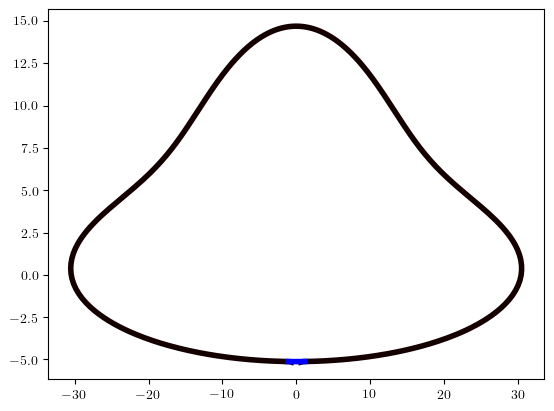

In [114]:
x_interp = np.concatenate((y[-20:-10], y[10:20]))
y_interp = np.concatenate((-x[-20:-10], -x[10:20]))
f = interp1d(x_interp, y_interp, kind = 'quadratic')
plt.plot(y,-x, color = sns.color_palette('hot_r', len(r_list))[idx],
            zorder = 2, lw = 4)

x_new = np.linspace(y[-10], y[10], 100)
plt.plot(x_new, f(x_new), color = 'blue',
            zorder = 2, lw = 4)
# plt.ylim(-6,-4)
# plt.xlim(-10, 10)
# plt.savefig('camisinha.png')
plt.show()

In [8]:
def IsoRadical(r):
    alpha_list = np.arange(0, 2*np.pi,0.01)
    b_list = []
    alpha_res = []
    #plt.figure(figsize = (15,15), dpi = 300)
    for alpha in alpha_list:    
        def cu(P):
            return 1 - r*Up(P,alpha)
        
        #P_list = np.arange(3*M, 50*M,0.1)
        
        #plt.plot(P_list, cu(P_list))
        
        guess = b_c + 0.1
        raiz = fsolve(cu,[guess])[0]
        if raiz != guess:
        
            #plt.scatter(raiz, cu(raiz))
            
            b_raiz = B_fun(raiz)
            b_list.append(b_raiz)
            alpha_res.append(alpha)
            
        # raiz = fsolve(cu,[4])[0]
        
        # #plt.scatter(raiz, cu(raiz))
        
        # b_raiz = B_fun(raiz)
        # b_list.append(b_raiz)
        
        #print("b raiz = ", b_raiz)
    #plt.plot(P_list, 0*np.ones(P_list.size), linestyle = 'dashed', color = 'black')
    #plt.show()
    
    x = b_list*np.cos(alpha_res)
    y = b_list*np.sin(alpha_res)
    
    return x,y

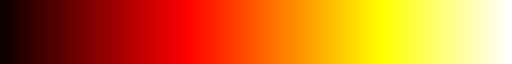

In [35]:
mpl.cm.hot#(norm = mpl.colors.PowerNorm(gamma=0.5))

In [131]:
for angle in tqdm([5*i for i in range(15,19)]):
    M = 1 # massa do BURACO negro
    b_c = 3*np.sqrt(3)*M # parametro de impacto CRITICO
    theta_0 = angle*np.pi/180. #angulo de visada do buraco negro

    fig, ax = plt.subplots(figsize = (8,8))
    #r_list = [30*M,20*M,10*M,6*M]
    r_list = np.arange(4,30,0.5)*M

    for idx, r in enumerate(r_list):
        if angle > 82:
            alpha_list = np.arange(0, 4*np.pi,0.01)
        else:
            alpha_list = np.arange(0, 2*np.pi,0.01)
        b_list = []
        alpha_res = []
        #plt.figure(figsize = (15,15), dpi = 300)
        for alpha in alpha_list:    
            def cu(P):
                return 1 - r*Up(P,alpha)

            #P_list = np.arange(3*M, 50*M,0.1)

            #plt.plot(P_list, cu(P_list))

            guess = b_c + 0.1
            raiz = fsolve(cu,[guess])[0]
            if raiz != guess:

                #plt.scatter(raiz, cu(raiz))

                b_raiz = B_fun(raiz)
                b_list.append(b_raiz)
                alpha_res.append(alpha)

            # raiz = fsolve(cu,[4])[0]

            # #plt.scatter(raiz, cu(raiz))

            # b_raiz = B_fun(raiz)
            # b_list.append(b_raiz)

            #print("b raiz = ", b_raiz)
        #plt.plot(P_list, 0*np.ones(P_list.size), linestyle = 'dashed', color = 'black')
        #plt.show()

        x = b_list*np.cos(alpha_res)
        y = b_list*np.sin(alpha_res)
        
        if angle < 82:
            if idx > 2:
                x_interp = np.concatenate((y[-20:-10], y[10:20]))
                y_interp = np.concatenate((-x[-20:-10], -x[10:20]))
                f = interp1d(x_interp, y_interp, kind = 'quadratic')

                x_new = np.linspace(y[-10], y[10], 100)
                plt.plot(x_new, f(x_new), color = sns.color_palette('hot_r', len(r_list))[idx],
                            zorder = 2, lw = 4)

        plt.plot(y,-x, color = sns.color_palette('hot_r', len(r_list))[idx],
                zorder = 2, lw = 4)

    # x_ovo = 3*M*np.cos(alpha_list)
    # y_ovo = 3*M*np.sin(alpha_list)
    circle = plt.Circle((0., 0.), 2*M, color='black', fill=True, zorder=1)
    plt.gca().add_patch(circle)
    circle = plt.Circle((0., 0.), 3*M, color='black', fill=True, zorder=1, alpha = 0.3)
    plt.gca().add_patch(circle)
    circle = plt.Circle((0., 0.), np.sqrt(3)*3*M, facecolor = 'none', edgecolor='white', fill=True,
                        zorder=1, lw = 3)
    plt.gca().add_patch(circle)

    plt.xlim(-32,32)
    plt.ylim(-32,32)
    plt.axis('off')
    fig.patch.set_color('dimgrey')
    for ax in fig.axes:
        ax.patch.set_color('dimgrey')
    plt.title(f'Black hole accretion disk view - {int(theta_0*180/np.pi)}º', fontsize = 20,
             color = 'white')
    plt.savefig(f'Isoradical_theta_{int(theta_0*180/np.pi)}_mass_{int(M)}.png',
                dpi = 300, bbox_inches = 'tight')
    plt.savefig(f'Isoradical_theta_{int(theta_0*180/np.pi)}_mass_{int(M)}.svg',
                dpi = 300, bbox_inches = 'tight')
    plt.close()

100%|██████████| 4/4 [04:24<00:00, 66.00s/it]
